In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = pd.read_csv('data\crypto_with_indicators.csv')
df.head()

,Open Time,BTCUSDT_Close,BTCUSDT_Volume,ETHUSDT_Close,ETHUSDT_Volume,XRPUSDT_Close,XRPUSDT_Volume,SOLUSDT_Close,SOLUSDT_Volume,BNBUSDT_Close,...,ARBUSDT_MFI_14,FDUSDUSDT_EMA_10,FDUSDUSDT_EMA_50,FDUSDUSDT_RSI_14,FDUSDUSDT_MACD,FDUSDUSDT_MACD_Signal,FDUSDUSDT_BB_Upper,FDUSDUSDT_BB_Middle,FDUSDUSDT_OBV,FDUSDUSDT_MFI_14
0,2020-03-25 00:00:00,6557.75,17042.837312,136.09,184453.53893,0.16024,34368839.9,NaN,NaN,12.1749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-25 04:00:00,6675.21,12406.070557,138.27,122363.50920,0.16226,24748020.1,NaN,NaN,12.4163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-25 08:00:00,6521.36,45370.620679,134.37,343216.98456,0.15810,64665116.6,NaN,NaN,12.1400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-25 12:00:00,6617.27,30706.295240,135.47,196526.13761,0.15938,41978907.8,NaN,NaN,12.2659,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-25 16:00:00,6622.38,14683.351661,135.77,92691.18497,0.16026,18471806.2,NaN,NaN,12.2300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:

# Function to drop columns with more than 100 missing values
def drop_columns_with_more_than_100_missing(df):
    return df.loc[:, df.isna().sum() <= 100]

# Example usage
df_cleaned = drop_columns_with_more_than_100_missing(df)

# Display the cleaned DataFrame
df_cleaned



,Open Time,BTCUSDT_Close,BTCUSDT_Volume,ETHUSDT_Close,ETHUSDT_Volume,XRPUSDT_Close,XRPUSDT_Volume,BNBUSDT_Close,BNBUSDT_Volume,USDCUSDT_Close,...,VETUSDT_MFI_14,ALGOUSDT_EMA_10,ALGOUSDT_EMA_50,ALGOUSDT_RSI_14,ALGOUSDT_MACD,ALGOUSDT_MACD_Signal,ALGOUSDT_BB_Upper,ALGOUSDT_BB_Middle,ALGOUSDT_OBV,ALGOUSDT_MFI_14
0,2020-03-25 00:00:00,6557.75,17042.837312,136.09,184453.53893,0.16024,34368839.9,12.1749,513792.160,0.9983,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.882567e+05,NaN
1,2020-03-25 04:00:00,6675.21,12406.070557,138.27,122363.50920,0.16226,24748020.1,12.4163,1017559.640,0.9972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.854277e+06,NaN
2,2020-03-25 08:00:00,6521.36,45370.620679,134.37,343216.98456,0.15810,64665116.6,12.1400,1017665.680,0.9975,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.612429e+06,NaN
3,2020-03-25 12:00:00,6617.27,30706.295240,135.47,196526.13761,0.15938,41978907.8,12.2659,472444.410,0.9975,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.453290e+05,NaN
4,2020-03-25 16:00:00,6622.38,14683.351661,135.77,92691.18497,0.16026,18471806.2,12.2300,333597.790,0.9982,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.977801e+06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10748,2025-02-18 08:00:00,95640.34,2483.181230,2679.26,88680.24520,2.57350,28661750.0,655.4700,59007.049,1.0002,...,38.812665,0.269545,0.284263,29.408649,-0.006980,-0.005297,0.295782,0.277305,2.708155e+09,32.012922
10749,2025-02-18 12:00:00,95546.48,4474.044580,2673.70,114342.87650,2.54070,41041883.0,648.1800,66310.534,1.0001,...,38.451480,0.266318,0.282990,24.968354,-0.007995,-0.005837,0.294615,0.275090,2.693925e+09,29.499088
10750,2025-02-18 16:00:00,94104.14,6846.154910,2630.37,139482.66420,2.51170,57299893.0,640.9400,107680.905,1.0004,...,31.645680,0.263551,0.281740,24.618100,-0.008756,-0.006421,0.293357,0.272995,2.679070e+09,22.793403
10751,2025-02-18 20:00:00,95671.74,4785.984830,2671.99,63593.57350,2.56280,27097647.0,648.1800,24791.233,1.0004,...,37.440577,0.262451,0.280789,33.766374,-0.008742,-0.006885,0.291547,0.271440,2.685181e+09,27.651355


In [5]:
df_cleaned=df_cleaned.dropna()
df_cleaned

,Open Time,BTCUSDT_Close,BTCUSDT_Volume,ETHUSDT_Close,ETHUSDT_Volume,XRPUSDT_Close,XRPUSDT_Volume,BNBUSDT_Close,BNBUSDT_Volume,USDCUSDT_Close,...,VETUSDT_MFI_14,ALGOUSDT_EMA_10,ALGOUSDT_EMA_50,ALGOUSDT_RSI_14,ALGOUSDT_MACD,ALGOUSDT_MACD_Signal,ALGOUSDT_BB_Upper,ALGOUSDT_BB_Middle,ALGOUSDT_OBV,ALGOUSDT_MFI_14
49,2020-04-02 04:00:00,6644.00,10475.344768,137.37,87216.37393,0.17693,22973839.9,12.7367,452748.760,0.9979,...,44.991400,0.153496,0.153362,55.003099,0.000144,-0.000111,0.157702,0.153430,1.443886e+07,58.425322
50,2020-04-02 08:00:00,6690.60,13134.740808,137.64,97180.27368,0.17684,19367832.3,12.9347,618858.680,0.9979,...,47.119647,0.154097,0.153497,57.894685,0.000405,-0.000008,0.157244,0.153925,1.606501e+07,58.511352
51,2020-04-02 12:00:00,6805.00,25457.406152,139.29,168900.65742,0.17865,36850706.6,13.1957,933351.590,0.9985,...,50.313147,0.154825,0.153677,60.277171,0.000708,0.000135,0.157930,0.154155,1.956587e+07,67.146712
52,2020-04-02 16:00:00,6803.25,62146.162565,140.85,484560.97208,0.17889,82516661.2,13.0767,1263165.770,0.9996,...,44.250343,0.155475,0.153863,60.828018,0.000961,0.000300,0.158565,0.154360,2.703935e+07,78.223368
53,2020-04-02 20:00:00,6794.09,19173.164020,141.28,146099.49442,0.17828,33913984.2,13.0166,1233946.410,0.9994,...,33.103882,0.155934,0.154025,59.640458,0.001116,0.000464,0.159030,0.154535,2.501446e+07,71.677125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10748,2025-02-18 08:00:00,95640.34,2483.181230,2679.26,88680.24520,2.57350,28661750.0,655.4700,59007.049,1.0002,...,38.812665,0.269545,0.284263,29.408649,-0.006980,-0.005297,0.295782,0.277305,2.708155e+09,32.012922
10749,2025-02-18 12:00:00,95546.48,4474.044580,2673.70,114342.87650,2.54070,41041883.0,648.1800,66310.534,1.0001,...,38.451480,0.266318,0.282990,24.968354,-0.007995,-0.005837,0.294615,0.275090,2.693925e+09,29.499088
10750,2025-02-18 16:00:00,94104.14,6846.154910,2630.37,139482.66420,2.51170,57299893.0,640.9400,107680.905,1.0004,...,31.645680,0.263551,0.281740,24.618100,-0.008756,-0.006421,0.293357,0.272995,2.679070e+09,22.793403
10751,2025-02-18 20:00:00,95671.74,4785.984830,2671.99,63593.57350,2.56280,27097647.0,648.1800,24791.233,1.0004,...,37.440577,0.262451,0.280789,33.766374,-0.008742,-0.006885,0.291547,0.271440,2.685181e+09,27.651355


In [6]:
df.columns.tolist()


['Open Time',
 'BTCUSDT_Close',
 'BTCUSDT_Volume',
 'ETHUSDT_Close',
 'ETHUSDT_Volume',
 'XRPUSDT_Close',
 'XRPUSDT_Volume',
 'SOLUSDT_Close',
 'SOLUSDT_Volume',
 'BNBUSDT_Close',
 'BNBUSDT_Volume',
 'USDCUSDT_Close',
 'USDCUSDT_Volume',
 'DOGEUSDT_Close',
 'DOGEUSDT_Volume',
 'ADAUSDT_Close',
 'ADAUSDT_Volume',
 'TRXUSDT_Close',
 'TRXUSDT_Volume',
 'LINKUSDT_Close',
 'LINKUSDT_Volume',
 'AVAXUSDT_Close',
 'AVAXUSDT_Volume',
 'SUIUSDT_Close',
 'SUIUSDT_Volume',
 'XLMUSDT_Close',
 'XLMUSDT_Volume',
 'TONUSDT_Close',
 'TONUSDT_Volume',
 'SHIBUSDT_Close',
 'SHIBUSDT_Volume',
 'LTCUSDT_Close',
 'LTCUSDT_Volume',
 'HBARUSDT_Close',
 'HBARUSDT_Volume',
 'DOTUSDT_Close',
 'DOTUSDT_Volume',
 'BCHUSDT_Close',
 'BCHUSDT_Volume',
 'OMUSDT_Close',
 'OMUSDT_Volume',
 'UNIUSDT_Close',
 'UNIUSDT_Volume',
 'PEPEUSDT_Close',
 'PEPEUSDT_Volume',
 'NEARUSDT_Close',
 'NEARUSDT_Volume',
 'AAVEUSDT_Close',
 'AAVEUSDT_Volume',
 'ICPUSDT_Close',
 'ICPUSDT_Volume',
 'APTUSDT_Close',
 'APTUSDT_Volume',
 'TAOUSD

## Analysis

#### Time Series Analysis

In [7]:
# Time Series Analysis - Convert Open Time to datetime
df_cleaned['Open Time'] = pd.to_datetime(df_cleaned['Open Time'])
print("\
Time range of the dataset:")
print(f"Start date: {df_cleaned['Open Time'].min()}")
print(f"End date: {df_cleaned['Open Time'].max()}")
print(f"Duration: {(df_cleaned['Open Time'].max() - df_cleaned['Open Time'].min()).days} days")

Time range of the dataset:
Start date: 2020-04-02 04:00:00
End date: 2025-02-19 00:00:00
Duration: 1783 days


<ipython-input-7-0e40e09e08e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Open Time'] = pd.to_datetime(df_cleaned['Open Time'])


The dataset spans a period of 1,783 days, covering data from April 2, 2020, to February 19, 2025. This extensive time range provides a comprehensive view of trends, patterns, and potential long-term changes within the dataset. 

The duration allows for meaningful analysis of seasonal variations, anomalies, and evolving trends over time.

#### Volatility Analysis

Volatility (standard deviation of daily returns):
BTCUSDT_Close_Return     1.310875
ETHUSDT_Close_Return     1.676259
BNBUSDT_Close_Return     1.750987
XRPUSDT_Close_Return     2.195226
USDCUSDT_Close_Return    0.108432
DOGEUSDT_Close_Return    3.080007
ADAUSDT_Close_Return     2.134582
dtype: float64


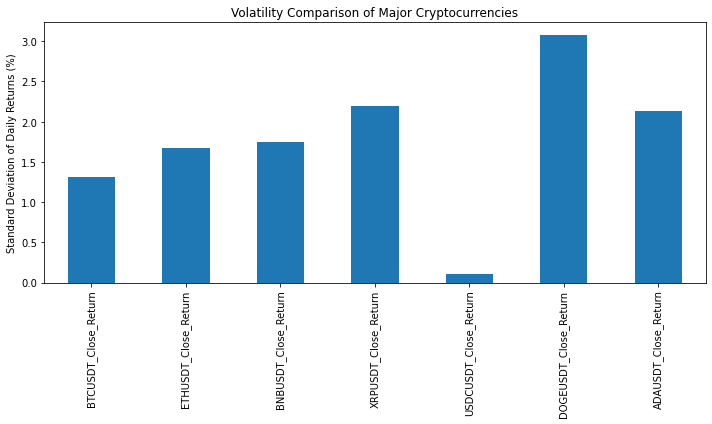

In [8]:
# Volatility Analysis - Calculate daily returns for major cryptocurrencies
major_cryptos = ['BTCUSDT_Close', 'ETHUSDT_Close', 'BNBUSDT_Close', 'XRPUSDT_Close','USDCUSDT_Close','DOGEUSDT_Close','ADAUSDT_Close',]
df_cleaned = df_cleaned.sort_values('Open Time')  # Ensure data is sorted by time

for crypto in major_cryptos:
    df_cleaned[f'{crypto}_Return'] = df_cleaned[crypto].pct_change() * 100

volatility = df_cleaned[[f'{crypto}_Return' for crypto in major_cryptos]].std()
print("\
Volatility (standard deviation of daily returns):")
print(volatility)

# Plot volatility
plt.figure(figsize=(10, 6))
volatility.plot(kind='bar')
plt.title('Volatility Comparison of Major Cryptocurrencies')
plt.ylabel('Standard Deviation of Daily Returns (%)')
plt.tight_layout()
plt.show()


DOGE has high volatility which indicates instaility in the market.

USD however has the lowest volatility indicating stability in the market.

High volatility means greater potential for both high returns and high risk.
Lower volatility suggests more stability but potentially lower returns.

#### Daily returns for various cryptocurrencies

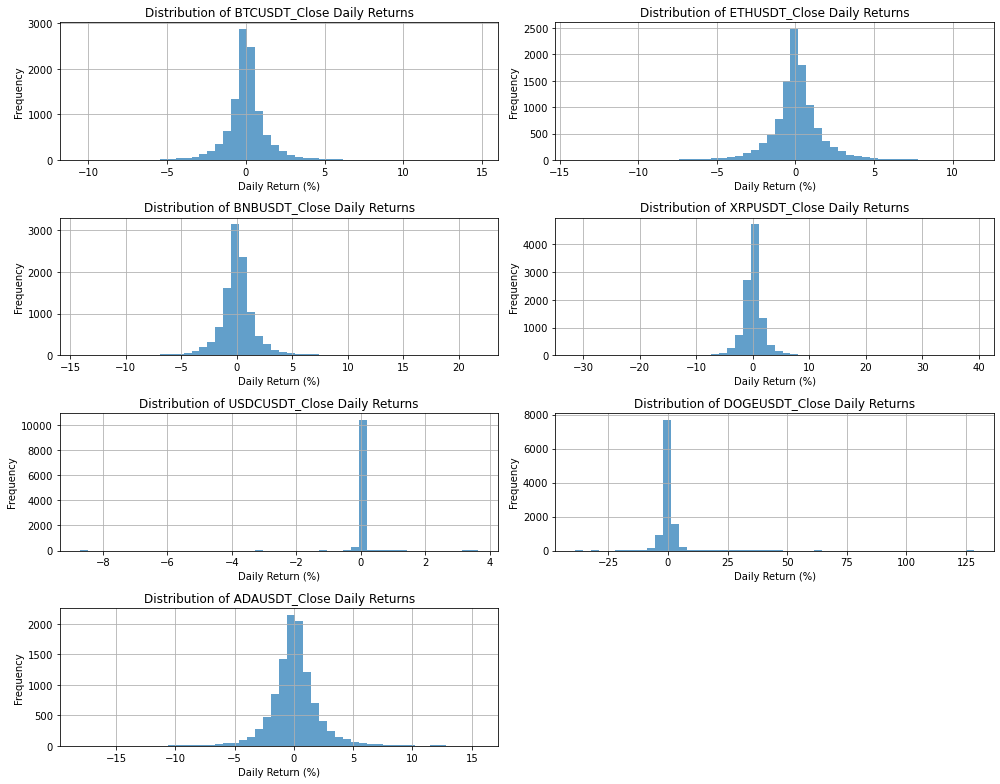

In [9]:
plt.figure(figsize=(14, 11))
for i, crypto in enumerate(major_cryptos):
    plt.subplot(4, 2, i+1)
    df_cleaned[f'{crypto}_Return'].hist(bins=50, alpha=0.7)
    plt.title(f'Distribution of {crypto} Daily Returns')
    plt.xlabel('Daily Return (%)')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Most returns cluster around zero, forming a roughly normal distribution.

Some cryptocurrencies exhibit higher volatility, with wider distributions and frequent large price swings.

Outliers and heavy tails indicate occasional extreme return events, reflecting market shocks or high-risk periods.

A few assets display low volatility, with sharp peaks around zero, suggesting stable price movements.

This analysis highlights the risk and variability of different cryptocurrencies, aiding in investment and risk management decisions.

#### Price trends, risk levels

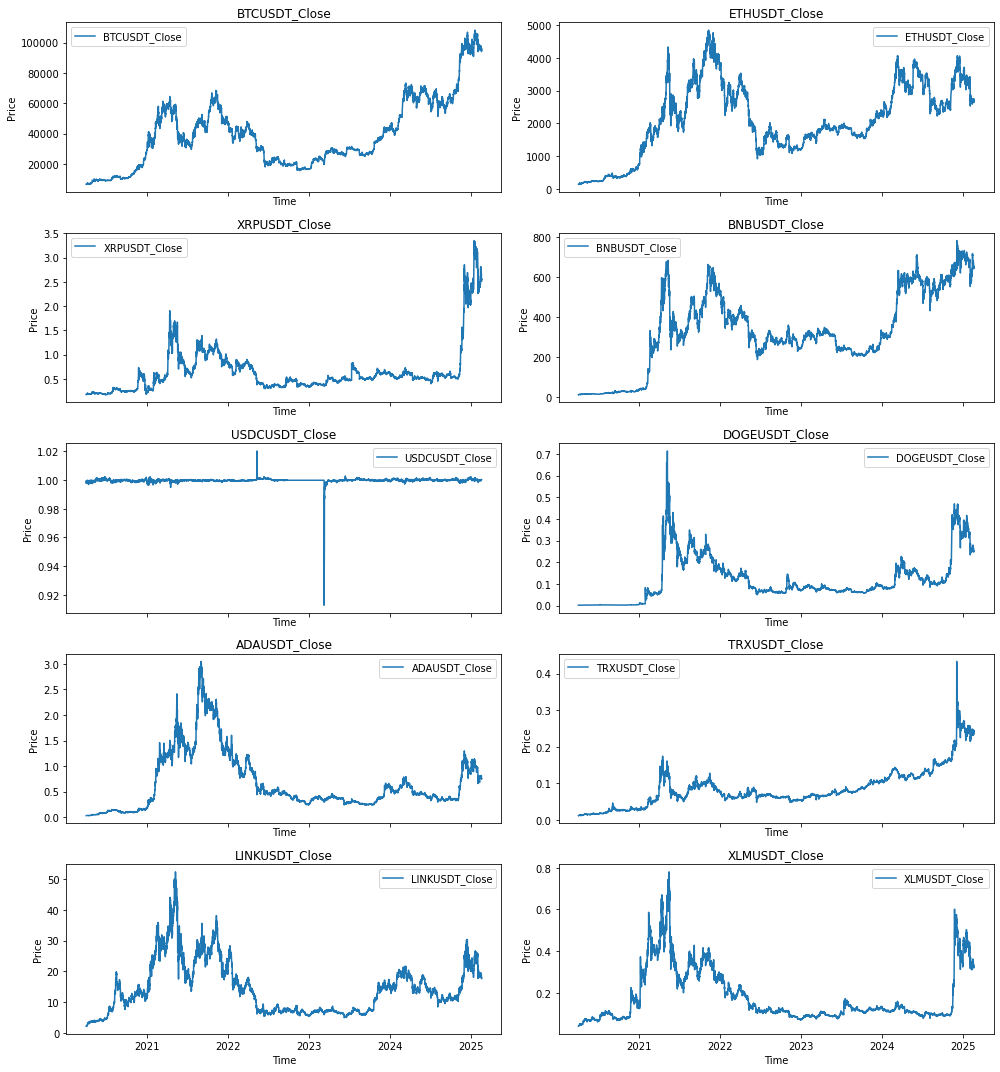

In [10]:
# Identify the top 10 cryptocurrencies based on closing price columns

crypto_close_columns = [col for col in df_cleaned.columns if '_Close' in col]
top_10_cryptos = crypto_close_columns[:10]

top10_df = df_cleaned[top_10_cryptos]

# Create a multi-panel plot of time series for top 10 cryptocurrencies
num_plots = len(top_10_cryptos)
cols = 2
rows = (num_plots + 1) // cols

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(14, rows * 3), sharex=True)
axes = axes.flatten()

for i, col in enumerate(top_10_cryptos):
    axes[i].plot(df_cleaned['Open Time'], top10_df[col], label=col)
    axes[i].set_title(col)
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Price')
    axes[i].legend()

# # Remove empty subplots
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

This visual presents the historical closing prices of various cryptocurrencies, highlighting their trends and volatility over time. Key observations include:

Bitcoin (BTC) and Ethereum (ETH) show long-term growth, experiencing multiple peaks and corrections.

Altcoins like DOGE, XRP, and XLM exhibit extreme price spikes, suggesting speculative trading.

USDC, a stablecoin, maintains a relatively flat price, reinforcing its role as a low-volatility asset.

Most cryptocurrencies follow market cycles, with periods of rapid growth followed by corrections.

High volatility is evident, making risk management crucial for investors.

This analysis provides insights into price trends, risk levels, and potential investment strategies.

#### Value at Risk(95% confidence) & 	Max_Drawdown

In [11]:

# List of top ten cryptos
cryptos = ['BTCUSDT', 'ETHUSDT', 'XRPUSDT', 'SOLUSDT', 'BNBUSDT', 
           'USDCUSDT', 'DOGEUSDT', 'ADAUSDT', 'TRXUSDT', 'LINKUSDT']

# Create an empty dictionary to store risk metrics
risk_metrics = {}

# Define maximum drawdown function
def calculate_max_drawdown(prices):
    prices = prices.dropna()
    peak = prices.expanding(min_periods=1).max()
    drawdown = (prices - peak) / peak
    return drawdown.min()


# Calculate risk metrics
for crypto in cryptos:
    if f"{crypto}_Close" not in df_cleaned.columns:
        continue  # Skip if price data is missing

    # Calculate daily returns
    df_cleaned[crypto + '_Returns'] = df[crypto + '_Close'].pct_change()
    returns = df_cleaned[crypto + '_Returns'].dropna()
    
    # Compute metrics
    var_95 = np.percentile(returns, 5)
    max_drawdown = calculate_max_drawdown(df_cleaned[crypto + '_Close'])

    # Store metrics
    risk_metrics[crypto] = {
        'VaR_95': var_95,
        'Max_Drawdown': max_drawdown
    }

# Convert results to DataFrame
risk_df = pd.DataFrame.from_dict(risk_metrics, orient='index')
risk_df



,VaR_95,Max_Drawdown
BTCUSDT,-0.019794,-0.770434
ETHUSDT,-0.025367,-0.811181
XRPUSDT,-0.028687,-0.844661
BNBUSDT,-0.024355,-0.724397
USDCUSDT,-0.000399,-0.105361
DOGEUSDT,-0.032726,-0.929440
ADAUSDT,-0.030547,-0.921883
TRXUSDT,-0.023665,-0.724862
LINKUSDT,-0.034051,-0.904035


VaR at 95% confidence level represents the potential daily loss under normal market conditions.
Lower VaR values (closer to zero) indicate lower expected losses, while higher negative values suggest higher downside risk.

BTCUSDT (-1.98%) and USDCUSDT (-0.04%) have the lowest VaR, meaning Bitcoin and USDC (a stablecoin) have relatively lower risk.
SOLUSDT (-3.89%) and LINKUSDT (-3.40%) have the highest VaR, indicating they are more volatile and prone to larger potential losses.

MDD measures the largest peak-to-trough decline during the period, showing how much an asset's price has fallen from its highest point.
Stablecoins like USDCUSDT have the lowest drawdown (-10.5%), confirming their price stability.
SOLUSDT (-96.6%) has the highest drawdown, showing that Solana experienced extreme losses at some point.
DOGE, ADA, and LINK also have large drawdowns (above -90%), meaning they suffered significant crashes.

Investors looking for stability should focus on BTC or USDC, while those seeking high-risk, high-reward opportunities might explore SOL, DOGE, and ADA.

#### Correlation matrix of the daily returns

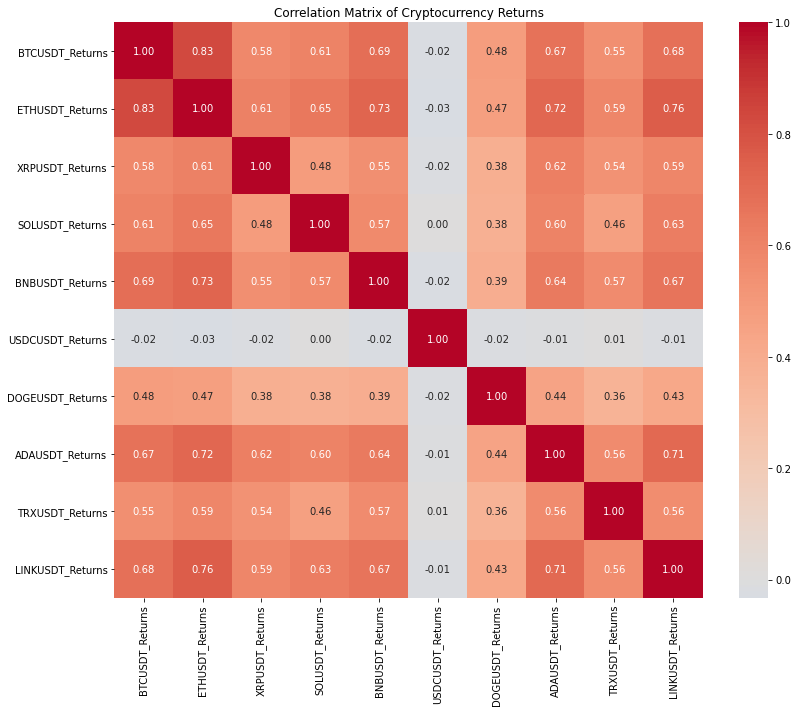

In [12]:
# Select 10 major cryptos
cryptos = ['BTCUSDT_Close', 'ETHUSDT_Close', 'XRPUSDT_Close', 'SOLUSDT_Close', 
           'BNBUSDT_Close', 'USDCUSDT_Close', 'DOGEUSDT_Close', 'ADAUSDT_Close', 
           'TRXUSDT_Close', 'LINKUSDT_Close']
# Calculate daily returns
returns_df = pd.DataFrame()
for crypto in cryptos:
    if crypto in df.columns:
        returns_df[crypto.replace('_Close', '_Returns')] = df[crypto].pct_change()
        
# Calculate correlation matrix
correlation_matrix = returns_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Cryptocurrency Returns')
plt.tight_layout()
plt.show()

This heatmap represents the correlation matrix of the daily returns of different cryptocurrencies. Here are the key takeaways:

Most cryptocurrencies are positively correlated, meaning they move together in price.

Stablecoins act as a hedge, with very low correlation to other cryptos.

Diversification within crypto is limited, as many assets tend to follow the same trends.